<a href="https://colab.research.google.com/github/jhbeann/Bigdata_R/blob/main/Chapter3_section4_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## SECTION4. 비지도학습
### 1. 군집분석을 위한 문제 해결

1) k-means 알고리즘
  - k:  그룹화하는 클러스터 개수
  - means: 각 클러스터 중심과 데이터들의 평균 거리
  - centroids : 클러스터 중심
  --> k개의 centroids 임시 지정 후 각 데이터들을 가까운 centroids 그룹에 할당 -> 업데이트 후  centroid 변하지 않을 때까지 반복.
  - 각 클러스터와 거리 차이의 분산 최소화

2) 분석 목표: 데이터셋으로 k-means 클러스팅 사용.
- 그룹화 하고 성능 평가
- 변수들 간의 상관성 시각화


In [2]:
library(dplyr)
library(ggplot2)

In [3]:
df<-iris

In [5]:
head(df,3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


In [6]:
str(df)

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


In [7]:
# 전처리
# 결측치 개수 확인
sum(is.na(df))

[1] 0

In [10]:
# species 문자열 컬럼 -> 레이블 인코딩(정수형으로 변환)
df$Species <-as.numeric(factor(df$Species),level = c("setosa","versicolor","virginica"))
head(df,3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,5.1,3.5,1.4,0.2,1
2,4.9,3.0,1.4,0.2,1
3,4.7,3.2,1.3,0.2,1


In [12]:
# Min-Max 정규화 : 데이터 값 크기 맞추기

normal <-function(x)(
  return((x-min(x))/(max(x)-min(x)))
)

# 정규화 함수 적용

df[1:4]<-as.data.frame(lapply(df[1:4],normal))
head(df,5)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.22222222,0.6250000,0.06779661,0.04166667,1
2,0.16666667,0.4166667,0.06779661,0.04166667,1
3,0.11111111,0.5000000,0.05084746,0.04166667,1
4,0.08333333,0.4583333,0.08474576,0.04166667,1
5,0.19444444,0.6666667,0.06779661,0.04166667,1


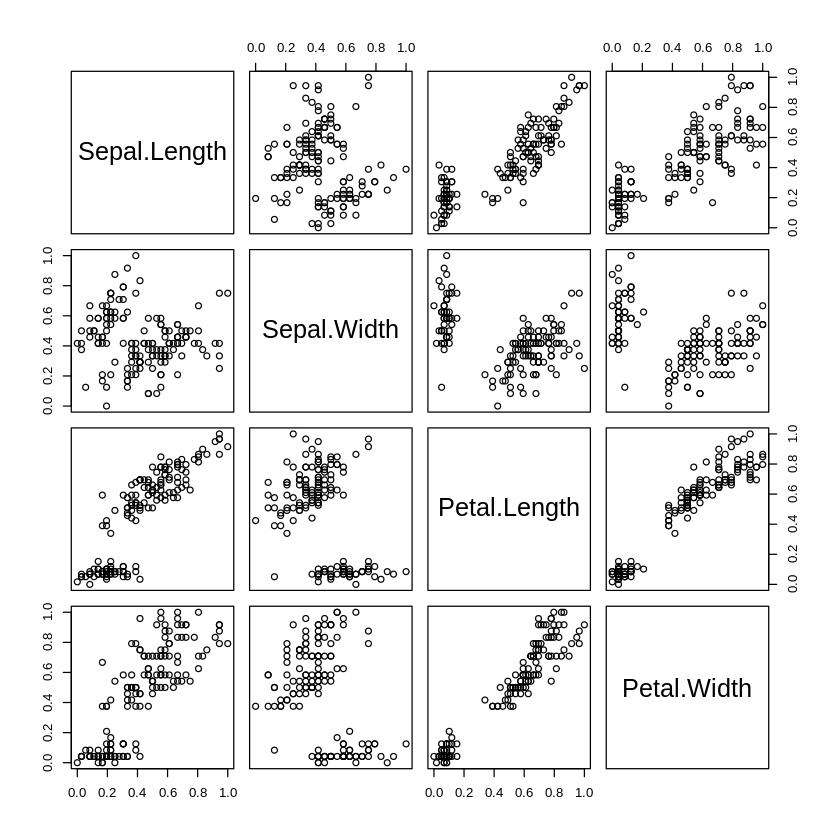

In [13]:
# 변수간 상관관계 시각화
pairs(df[,-5])

In [14]:
cor(df[1:4])

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,1.0000000,-0.1175698,0.8717538,0.8179411
Sepal.Width,-0.1175698,1.0000000,-0.4284401,-0.3661259
Petal.Length,0.8717538,-0.4284401,1.0000000,0.9628654
Petal.Width,0.8179411,-0.3661259,0.9628654,1.0000000


K-means 클러스터링
- center : 클러스터 개수
- iter.max : 알고리즘 반복 횟수


In [16]:
# K-means 클러스터링
cluster1 <- kmeans(df[,-5],centers = 2, iter.max = 1000)
cluster1

K-means clustering with 2 clusters of sizes 50, 100

Cluster means:
  Sepal.Length Sepal.Width Petal.Length Petal.Width
1    0.1961111   0.5950000   0.07830508  0.06083333
2    0.5450000   0.3633333   0.66203390  0.65666667

Clustering vector:
  [1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [75] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[112] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[149] 2 2

Within cluster sum of squares by cluster:
[1]  1.829062 10.298729
 (between_SS / total_SS =  70.5 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

실행결과
- 100개,50개의 2개의 클러스터로 분류
- 각 클러스터의 평균값 보여줌
- between_SS / total_SS : 전체 변동 중 군집간 변동이 차지하는 비율(1에 가까울 수록 잘 분류)
- 1과 2 임의로 지정해서 나옴. 유사한 데이터를 같은 값으로 묶어주고 있는지가 중요함.



성능평가 & 시각화
- 적절한 k 개를 설정했는지 평가.
- tot.withinss : 군집별 오차의 제곱 합
- k 증가-> 샘플이 할당된 centroid 에 근접-> tot.withinss 감소
- Elbow기법: tot.withinss가 빠르게 줄어드는 변화 시점




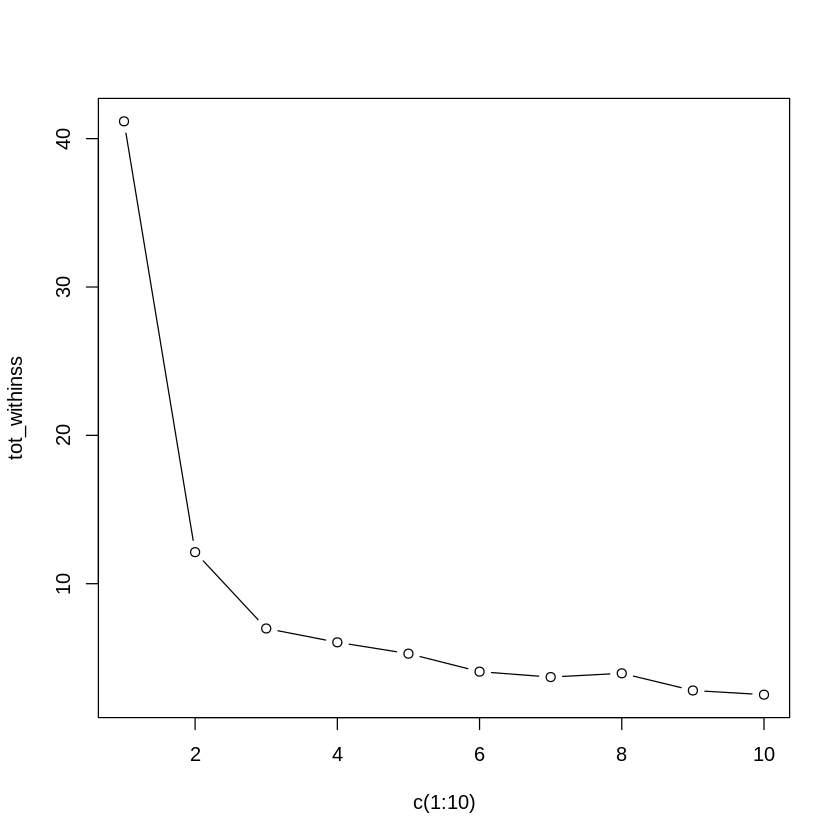

In [17]:
# 군집내 분산을 계산하여 최적의 k 값 찾기

tot_withinss <- c()

for (i in 1:10){
  cluster1<- kmeans(df[,-5], center = i, iter.max = 1000)
  tot_withinss[i] <- cluster1$tot.withinss
}

plot(c(1:10),tot_withinss, type = "b")
# ==> k=3일 때 빠르게 줄어든다.

### 2. 연관분석 이용한 문제해결
- 장바구니 분석
- 규칙을 발견하기 위한 평가 척도
  - 지지도(support) : a,b 모두 구매하는 확률
  - 신뢰도(confidence) : a를 구매할 확률 중 a와b 모두 구매할 확률
  - 향상도(lift) : b를 구매하는 확률 중 b를 구매할 때 a를 구매할 확률
    - 향 >1 : 클수록 관련도 높음
    - 향 =1 : 관련 없음
    - 0< 향 <1 : a를 선택하면 b를 선택하지 않음

In [18]:
library(dplyr)
library(ggplot2)

# 연관분석 위한 arules 패키지
install.packages("arules")
library(arules)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: Matrix


Attaching package: ‘arules’


The following object is masked from ‘package:dplyr’:

    recode


The following objects are masked from ‘package:base’:

    abbreviate, write




In [19]:
# 연관규칙 알고리즘 적용하기 위해 트랜잭션 형태로 구성되어야 함.

tr <- read.transactions("sample_data/retail_dataset.csv",format ="basket",sep=",")

In [22]:
# 트랜잭션 형태 데이터 보기 위해 inspect() 함수 사용
inspect(tr[1:10])

     items                                            
[1]  {Bread, Cheese, Diaper, Eggs, Meat, Pencil, Wine}
[2]  {Bread, Cheese, Diaper, Meat, Milk, Pencil, Wine}
[3]  {Cheese, Eggs, Meat, Milk, Wine}                 
[4]  {Cheese, Eggs, Meat, Milk, Wine}                 
[5]  {Meat, Pencil, Wine}                             
[6]  {Bagel, Bread, Diaper, Eggs, Milk, Pencil, Wine} 
[7]  {Cheese, Eggs, Pencil, Wine}                     
[8]  {Bagel, Bread, Diaper, Milk, Pencil}             
[9]  {Bread, Cheese, Diaper, Eggs, Milk, Wine}        
[10] {Bagel, Cheese, Diaper, Eggs, Meat, Pencil, Wine}


In [21]:
# 전처리
# 컬럼명인 첫번째행 삭제
tr<-tr[-1]
inspect(tr[1:5])

    items                                            
[1] {Bread, Cheese, Diaper, Eggs, Meat, Pencil, Wine}
[2] {Bread, Cheese, Diaper, Meat, Milk, Pencil, Wine}
[3] {Cheese, Eggs, Meat, Milk, Wine}                 
[4] {Cheese, Eggs, Meat, Milk, Wine}                 
[5] {Meat, Pencil, Wine}                             


In [23]:
# 트랜잭션 특징 확인
summary(tr)

transactions as itemMatrix in sparse format with
 315 rows (elements/itemsets/transactions) and
 16 columns (items) and a density of 0.253373 

most frequent items:
  Bread  Cheese    Milk    Meat    Eggs (Other) 
    159     158     158     150     138     514 

element (itemset/transaction) length distribution:
sizes
 1  2  3  4  5  6  7 
30 40 58 54 62 30 41 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   3.000   4.000   4.054   5.000   7.000 

includes extended item information - examples:
  labels
1      0
2      1
3      2

arules 패키지의 apriori() 함수 사용
- apriori : 장바구니 구매 데이터 연관분석
- support: 최소지지도
- confidence : 최소 신뢰도


In [24]:
# apriori 함수 적용
rules <- apriori(tr, parameter = list(support=0.2, confidence = 0.5))
rules

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.5    0.1    1 none FALSE            TRUE       5     0.2      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 63 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[9 item(s), 315 transaction(s)] done [0.00s].
sorting and recoding items ... [9 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 done [0.00s].
writing ... [38 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


set of 38 rules 

실행결과

set of 38 rules --> 상호 연관성이 높은 구매항목들이 38개 규칙으로 생성된다.


생성된 규칙을 신뢰도 내림차순으로 출력
- lhs 구매했을 때 rhs 구매한다는 규칙
- 각 규칙의 지지도(support), 신뢰도(confidence),향상도(lift) 보여줌
- 신뢰도가 높을 때 구매 품목들의 연관성이 높다.

In [25]:
inspect(sort(rules, by = c("confidence"), decreasing = T))

     lhs               rhs      support   confidence coverage  lift      count
[1]  {Meat, Milk}   => {Cheese} 0.2031746 0.8311688  0.2444444 1.6570771  64  
[2]  {Eggs, Meat}   => {Cheese} 0.2158730 0.8095238  0.2666667 1.6139241  68  
[3]  {Cheese, Eggs} => {Meat}   0.2158730 0.7234043  0.2984127 1.5191489  68  
[4]  {Eggs}         => {Cheese} 0.2984127 0.6811594  0.4380952 1.3580077  94  
[5]  {Meat}         => {Cheese} 0.3238095 0.6800000  0.4761905 1.3556962 102  
[6]  {Cheese, Meat} => {Eggs}   0.2158730 0.6666667  0.3238095 1.5217391  68  
[7]  {Cheese, Milk} => {Meat}   0.2031746 0.6666667  0.3047619 1.4000000  64  
[8]  {Bagel}        => {Bread}  0.2793651 0.6567164  0.4253968 1.3010420  88  
[9]  {Cheese}       => {Meat}   0.3238095 0.6455696  0.5015873 1.3556962 102  
[10] {Cheese, Meat} => {Milk}   0.2031746 0.6274510  0.3238095 1.2509308  64  
[11] {Wine}         => {Cheese} 0.2698413 0.6159420  0.4380952 1.2279857  85  
[12] {Eggs}         => {Meat}   0.2666667 0.6086957 